<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW5/CBdataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#example of usage of pandas functions and methods - 
also see https://github.com/fedhere/DSPS/blob/master/dataWrangling/PandasDataWrangling-Chap7.ipynb:

focusing on 

```merge```

```groupby```

```sort_values```

In [0]:
from __future__ import print_function, division

remember to moce imports to the top cell. I am leaving them in the cell where I use them for clarity

I am going to download 2 datasets from Citibike, the NYC bikeshare program. The anonymized citibike data is openly released for each month. I am downloading Ocptber 2015 and October 2016 to see trends in usage. 

In [3]:
!wget https://s3.amazonaws.com/tripdata/201510-citibike-tripdata.zip

--2019-09-26 22:11:25--  https://s3.amazonaws.com/tripdata/201510-citibike-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.115.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.115.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41817833 (40M) [application/zip]
Saving to: ‘201510-citibike-tripdata.zip’

201510-citibike-tri 100%[===================>]  39.88M  33.4MB/s    in 1.2s    

2019-09-26 22:11:27 (33.4 MB/s) - ‘201510-citibike-tripdata.zip’ saved [41817833/41817833]



In [4]:
!wget https://s3.amazonaws.com/tripdata/201610-citibike-tripdata.zip

--2019-09-26 22:11:28--  https://s3.amazonaws.com/tripdata/201610-citibike-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.164.109
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.164.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52917646 (50M) [application/zip]
Saving to: ‘201610-citibike-tripdata.zip’

201610-citibike-tri 100%[===================>]  50.47M  33.7MB/s    in 1.5s    

2019-09-26 22:11:30 (33.7 MB/s) - ‘201610-citibike-tripdata.zip’ saved [52917646/52917646]



In [5]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
#creating a folder for the data in my drive
mkdir "drive/My Drive/citibikes"

mkdir: cannot create directory ‘drive/My Drive/citibikes’: File exists


In [7]:
#unzipping the data there 
!unzip 201510-citibike-tripdata.zip -d "drive/My Drive/citibikes"
!unzip 201610-citibike-tripdata.zip -d "drive/My Drive/citibikes"

Archive:  201510-citibike-tripdata.zip
replace drive/My Drive/citibikes/201510-citibike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  201610-citibike-tripdata.zip
replace drive/My Drive/citibikes/201610-citibike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
ls "drive/My Drive/citibikes"

201510-citibike-tripdata.csv  201610-citibike-tripdata.csv


In [0]:
rm "201510-citibike-tripdata.zip"

In [0]:
rm "201610-citibike-tripdata.zip"

In [0]:
#read in data with pandas
import pandas as pd
cb15 = pd.read_csv("drive/My Drive/citibikes/201510-citibike-tripdata.csv")
cb16 = pd.read_csv("drive/My Drive/citibikes/201610-citibike-tripdata.csv")

In [12]:
cb15.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,171,10/1/2015 00:00:02,10/1/2015 00:02:54,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,24302,Subscriber,1973.0,1
1,593,10/1/2015 00:00:02,10/1/2015 00:09:55,518,E 39 St & 2 Ave,40.747804,-73.973442,438,St Marks Pl & 1 Ave,40.727791,-73.985649,19904,Subscriber,1990.0,1
2,233,10/1/2015 00:00:11,10/1/2015 00:04:05,447,8 Ave & W 52 St,40.763707,-73.985162,447,8 Ave & W 52 St,40.763707,-73.985162,17797,Subscriber,1984.0,1
3,250,10/1/2015 00:00:15,10/1/2015 00:04:25,336,Sullivan St & Washington Sq,40.730477,-73.999061,223,W 13 St & 7 Ave,40.737815,-73.999947,23966,Subscriber,1984.0,1
4,528,10/1/2015 00:00:17,10/1/2015 00:09:05,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,16246,Customer,NaN,0


In [13]:
cb16.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,-73.953517,17810,Subscriber,1988.0,2
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,-74.000040,20940,Subscriber,1965.0,1
3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,19086,Subscriber,1993.0,1
4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,40.798186,-73.960591,26502,Subscriber,1991.0,1


In [14]:
cb15.shape, cb16.shape

((1212277, 15), (1573872, 15))

In [15]:
# one can join the dataframes one after the other, 
# this is trivial if the column names are the same. 
#If they are not new columns are created, like in this case, and filled with NaN
cd1516 = pd.concat([cb15, cb16])
cd1516.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2786149, 30)

In [16]:
cd1516.head()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24302.0,1973.0,494.0,40.747348,-73.997236,W 26 St & 8 Ave,1.0,388.0,40.749718,-74.002950,W 26 St & 10 Ave,10/1/2015 00:00:02,10/1/2015 00:02:54,171.0,Subscriber
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19904.0,1990.0,438.0,40.727791,-73.985649,St Marks Pl & 1 Ave,1.0,518.0,40.747804,-73.973442,E 39 St & 2 Ave,10/1/2015 00:00:02,10/1/2015 00:09:55,593.0,Subscriber
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17797.0,1984.0,447.0,40.763707,-73.985162,8 Ave & W 52 St,1.0,447.0,40.763707,-73.985162,8 Ave & W 52 St,10/1/2015 00:00:11,10/1/2015 00:04:05,233.0,Subscriber
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23966.0,1984.0,223.0,40.737815,-73.999947,W 13 St & 7 Ave,1.0,336.0,40.730477,-73.999061,Sullivan St & Washington Sq,10/1/2015 00:00:15,10/1/2015 00:04:25,250.0,Subscriber
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16246.0,NaN,539.0,40.715348,-73.960241,Metropolitan Ave & Bedford Ave,0.0,3107.0,40.723117,-73.952123,Bedford Ave & Nassau Ave,10/1/2015 00:00:17,10/1/2015 00:09:05,528.0,Customer


In [0]:
#extract only relevant columns. 
cb16new = cb16[["Start Station Name", "Bike ID"]]
cb15new = cb15[["start station name", "bikeid"]]


# groupby()

In [18]:
#groupby() groups all observations that have the same value for the chosen key, 
# in this case bikeid
cb15new.groupby("bikeid")

## the return value of groupby is not a dataframe, it is a groupby object. 
If you want a dataframe you have to devlare what you want to do with the groups: e.g. take the average of the group ```groupby().mean()```, count the elements in the group ```groupby().count()```, or even create a function that does what you want and apply it with ```groupby().apply(func)```where func is your callable function, etc etc...

In [0]:
cb15gp = cb15new.groupby("bikeid")

In [20]:
cb15gp.count()

,start station name
bikeid,
14529,120
14530,107
14531,132
14532,196
14533,139
14534,65
14535,132
14536,87
14537,134


note that the grouping column has become the index. This may or may not be desirable. You can fix it though if it is not.

In [21]:
cb15gp.count().reset_index()

,bikeid,start station name
0,14529,120
1,14530,107
2,14531,132
3,14532,196
4,14533,139
5,14534,65
6,14535,132
7,14536,87
8,14537,134
9,14538,115


In [0]:
cb15min = cb15gp.count().reset_index()
cb16gp = cb16new.groupby("Bike ID")
cb16min = cb16gp.count().reset_index()

In [23]:
cb15min.head()

,bikeid,start station name
0,14529,120
1,14530,107
2,14531,132
3,14532,196
4,14533,139


In [24]:
cb16min.head()

,Bike ID,Start Station Name
0,14529,94
1,14530,105
2,14531,94
3,14532,128
4,14533,115


In [25]:
#renaming the column that is counted on: "start station name" and "Start Station Name"
cb15min.rename({"start station name": "2015trips"}, axis=1, inplace=True)
cb16min.rename({"Start Station Name": "2016trips"}, axis=1, inplace=True)
cb15min.head()

,bikeid,2015trips
0,14529,120
1,14530,107
2,14531,132
3,14532,196
4,14533,139


# merge()
merge() pyts together featured for observations with a common value. You need to tell it on what feature (column) you want to merge tho, unless there is a feature by the same column name. In this case there is not.

In [26]:
pd.merge(cb15min, cb16min)

MergeError: ignored

In [31]:
cbmerged = pd.merge(cb15min, cb16min, left_on = "bikeid", right_on="Bike ID")
cbmerged.head()

,bikeid,2015trips,Bike ID,2016trips
0,14529,120,14529,94
1,14530,107,14530,105
2,14531,132,14531,94
3,14532,196,14532,128
4,14533,139,14533,115


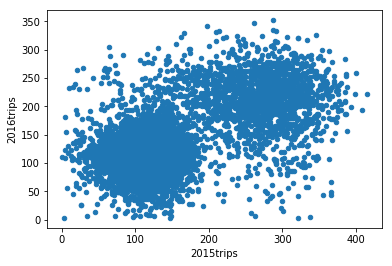

Figure 1: trend in number of rides in 2016 vs 2015 by bike. 
there appears to be a weak linear relationship that indicated some bikes
are consistently used more than others


In [40]:
import pylab as pl
cbmerged.plot(x="2015trips", y="2016trips", kind="scatter");
pl.show()
print("Figure 1: trend in number of rides in 2016 vs 2015 by bike. \n" +
      "there appears to be a weak linear relationship that indicated some bikes\n" +
      "are consistently used more than others")

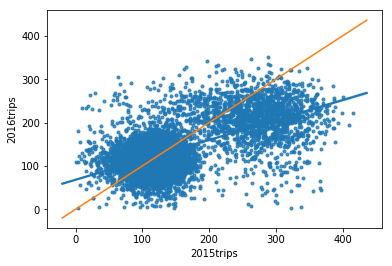

Figure 2: As figure one, with linear fit and x=y line plotted.
The sublinear slope of the fit line indicates bikes are less used in 016 than in 2015.
This may be fore a number of reasons, including increase offer of bikes and bike stations
that does better than compensating for the increasing demand. It is also possible however that
newer bikes are more likely to be picked. No way to get at causality at all with this shallw
analysis. 
EXTRA CREDIT: which kind of data science analysis is this according to Leek and Peng's work?


In [46]:
import seaborn as sb
ax = sb.regplot("2015trips", "2016trips", data=cbmerged, marker=".") 
pl.plot(ax.get_xlim(),ax.get_xlim()) 
pl.show()
print("Figure 2: As figure one, with linear fit and x=y line plotted.\n" + 
        "The sublinear slope of the fit line indicates bikes are less used in 016 than in 2015.\n" + 
        "This may be fore a number of reasons, including increase offer of bikes and bike stations\n" +
        "that does better than compensating for the increasing demand. It is also possible however that\n" +
        "newer bikes are more likely to be picked. No way to get at causality at all with this shallw\n" +
        "analysis. \nEXTRA CREDIT: which kind of data science analysis is this according to Leek and Peng's work?")

In [51]:
# what is the most used boke?
cbmerged['totrides'] = cbmerged["2015trips"] + cbmerged["2016trips"]
cbsortedClean = cbmerged.sort_values("totrides", ascending=False).drop([
    "2015trips", "2016trips", "bikeid"], axis=1)
cbsortedClean.head()

,Bike ID,totrides
6562,23358,672
5504,21995,670
6404,23180,660
7136,24009,660
6875,23717,654


In [53]:
print ("The most used bike is BikeID: {} with {} rides".format(
    cbsortedClean["Bike ID"].iloc[0], cbsortedClean["totrides"].iloc[0]))

The most used bike is BikeID: 23358 with 672 rides
